In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from datetime import timedelta

### olist_customers_datase.csv — таблица с уникальными идентификаторами пользователей

<b>customer_id</b> — позаказный идентификатор пользователя

<b>customer_unique_id</b> —  уникальный идентификатор пользователя  (аналог номера паспорта)

<b>customer_zip_code_prefix</b> —  почтовый индекс пользователя

<b>customer_city </b>—  город доставки пользователя

<b>customer_state</b> —  штат доставки пользователя

In [2]:
customers = pd.read_csv('olist_customers_dataset.csv')

In [3]:
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [4]:
# customers.loc[customers.customer_unique_id == '8d50f5eadf50201ccdcedfb9e2ac8455']

In [5]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


### olist_orders_dataset.csv —  таблица заказов

<b> order_id </b> —  уникальный идентификатор заказа (номер чека)

<b> customer_id </b>—  позаказный идентификатор пользователя

<b>order_status</b> —  статус заказа

<b>order_purchase_timestamp</b> —  время создания заказа

<b>order_approved_at</b> —  время подтверждения оплаты заказа

<b>order_delivered_carrier_date</b> —  время передачи заказа в логистическую службу

<b>order_delivered_customer_date </b>—  время доставки заказа

<b>order_estimated_delivery_date </b>—  обещанная дата доставки

In [6]:
orders = pd.read_csv('olist_orders_dataset.csv',parse_dates=['order_purchase_timestamp','order_approved_at','order_delivered_carrier_date','order_delivered_customer_date','order_estimated_delivery_date'])

In [7]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


In [8]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [9]:
orders.order_status.unique()

array(['delivered', 'invoiced', 'shipped', 'processing', 'unavailable',
       'canceled', 'created', 'approved'], dtype=object)

In [10]:
df_status=orders.groupby('order_status')\
                   .agg({'order_id':'count'})\
                   .sort_values('order_id',ascending=False)\
                   .rename(columns={"order_id":"amount"})\
                   .reset_index()
df_status

,order_status,amount
0,delivered,96478
1,shipped,1107
2,canceled,625
3,unavailable,609
4,invoiced,314
5,processing,301
6,created,5
7,approved,2


<AxesSubplot:xlabel='order_status', ylabel='amount'>

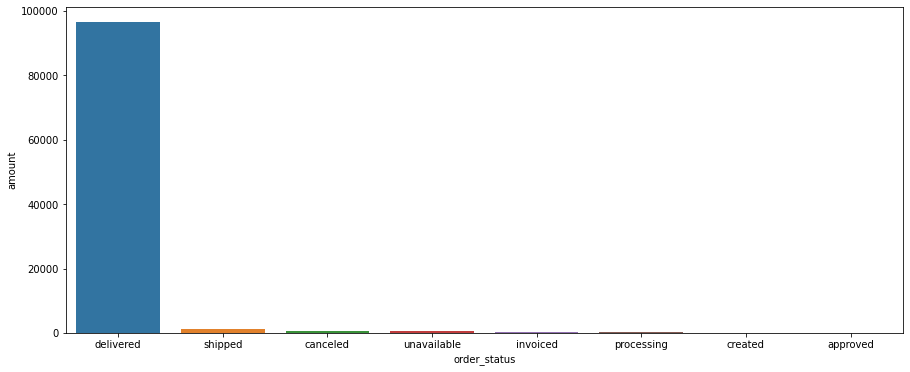

In [11]:
plt.figure(figsize=(15, 6))
sns.barplot(x=df_status.order_status, y = df_status.amount)

In [12]:
# статусы оплаченных заказов
np.unique(orders.query('order_approved_at==order_approved_at')['order_status'].values)

array(['approved', 'canceled', 'delivered', 'invoiced', 'processing',
       'shipped', 'unavailable'], dtype=object)

## Покупкой буду считать заказ, за который получена оплата. В соответствии с условием "order_approved_at —  это время подтверждения оплаты заказа" - то есть наличие данных в этом столбце, говорит о том, что заказ был оплачен.

### При этом оплаченные заказы могут иметь разные статусы, например, быть в процессе доставки или обработки и др.

В данных видно, что некоторые заказы имеют статус "delivered", при этом не имея информации об оплате. Буду считать это ошибкой внесения информации в систему и удаляю их.

In [13]:
orders=orders[~((orders['order_status']=='delivered') & (orders['order_approved_at'].isna()))]
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


In [14]:
orders.order_status.unique()

array(['delivered', 'invoiced', 'shipped', 'processing', 'unavailable',
       'canceled', 'created', 'approved'], dtype=object)


### olist_order_items_dataset.csv —  товарные позиции, входящие в заказы

<b>order_id</b> —  уникальный идентификатор заказа (номер чека)

<b>order_item_id </b>—  идентификатор товара внутри одного заказа

<b>product_id</b> —  ид товара (аналог штрихкода)

<b>seller_id</b> — ид производителя товара

<b>shipping_limit_date</b> —  максимальная дата доставки продавцом для передачи заказа партнеру по логистике

<b>price </b>—  цена за единицу товара

<b>freight_value</b> —  вес товара

In [15]:
order_items = pd.read_csv('olist_order_items_dataset.csv',parse_dates=['shipping_limit_date'])

In [16]:
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [17]:
order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


In [18]:
# order_items.query('freight_value == 0')

# 1. Сколько у нас пользователей, которые совершили покупку только один раз?

Объединим нужные датафреймы

In [19]:
merged_df = customers \
                .merge(orders,how='inner',on='customer_id') \
                .merge(order_items,how='left',on='order_id')

In [20]:
merged_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,1.0,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,1.0,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,1.0,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,1.0,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,1.0,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25


Покупка - это оплаченный заказ. Если вес товара в колонке freight_value равен 0, будем считать это за ошибку системы и не будем брать в агрегацию такие заказы.

In [21]:
filtered_df = merged_df.query('order_approved_at==order_approved_at and freight_value != 0')

In [22]:
# filtered_df.loc[merged_df.customer_unique_id == 'fff5eb4918b2bf4b2da476788d42051c']

Посчитаем количество пользователей, совершивших покупку один раз

In [23]:
filtered_df \
    .groupby('customer_unique_id',as_index=False) \
    .order_id.nunique() \
    .rename(columns={'order_id':'num_of_orders'}) \
    .query('num_of_orders == 1') \
    .customer_unique_id.nunique()

92721

# 2. Сколько заказов в месяц в среднем не доставляется по разным причинам (вывести детализацию по причинам)?

In [24]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


 Отберем заказы со всеми статусами, кроме доставлен:

In [25]:
df_undelidered= orders.query('order_status!="delivered"')
df_undelidered.sort_values('order_purchase_timestamp').head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
4541,2e7a8482f6fb09756ca50c10d7bfc047,08c5351a6aca1c1589a38f244edeee9d,shipped,2016-09-04 21:15:19,2016-10-07 13:18:03,2016-10-18 13:14:51,NaT,2016-10-20
4396,e5fa5a7210941f7d56d0208e4e071d35,683c54fc24d40ee9f8a6fc179fd9856c,canceled,2016-09-05 00:15:34,2016-10-07 13:17:15,NaT,NaT,2016-10-28
10071,809a282bbd5dbcabb6f2f724fca862ec,622e13439d6b5a0b486c435618b2679e,canceled,2016-09-13 15:24:19,2016-10-07 13:16:46,NaT,NaT,2016-09-30
83078,71303d7e93b399f5bcd537d124c0bcfa,b106b360fe2ef8849fbbd056f777b4d5,canceled,2016-10-02 22:07:52,2016-10-06 15:50:56,NaT,NaT,2016-10-25
92636,65d1e226dfaeb8cdc42f665422522d14,70fc57eeae292675927697fe03ad3ff5,canceled,2016-10-03 21:01:41,2016-10-04 10:18:57,2016-10-25 12:14:28,2016-11-08 10:58:34,2016-11-25


При исследовании датафрейма были замечены аномалии в данных. 

На примере заказа со статусом 'shipped' видим, что во время доставки с ним что-то произошло, и он так и не был доставлен клиенту.

Аналогично и заказы с другими статусами (кроме статуса "delivered").

In [26]:
df_undelidered.query('order_id=="2e7a8482f6fb09756ca50c10d7bfc047"') 

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
4541,2e7a8482f6fb09756ca50c10d7bfc047,08c5351a6aca1c1589a38f244edeee9d,shipped,2016-09-04 21:15:19,2016-10-07 13:18:03,2016-10-18 13:14:51,NaT,2016-10-20


In [27]:
df_undelidered.order_delivered_customer_date.isna().sum()

2957

In [28]:
# Считаем кол-во месяцев в датафрейме
months_num =(orders.order_approved_at.max() - orders.order_approved_at.min()) / np.timedelta64(1, 'M')

In [29]:
 # Считаем среднее количество недоставленных заказов в месяц по разным причинам
df_status_undelivered=orders.query('(order_status != "delivered")&(order_delivered_customer_date!=order_delivered_customer_date)')\
         .groupby('order_status')\
         .agg({'order_id':'count'})\
         .sort_values('order_id')\
         .assign(avg_undelivered=lambda x: x.order_id/months_num)[['avg_undelivered']].round(2)\
.reset_index()

In [30]:
df_status_undelivered

,order_status,avg_undelivered
0,approved,0.08
1,created,0.21
2,processing,12.76
3,invoiced,13.31
4,unavailable,25.81
5,canceled,26.23
6,shipped,46.91


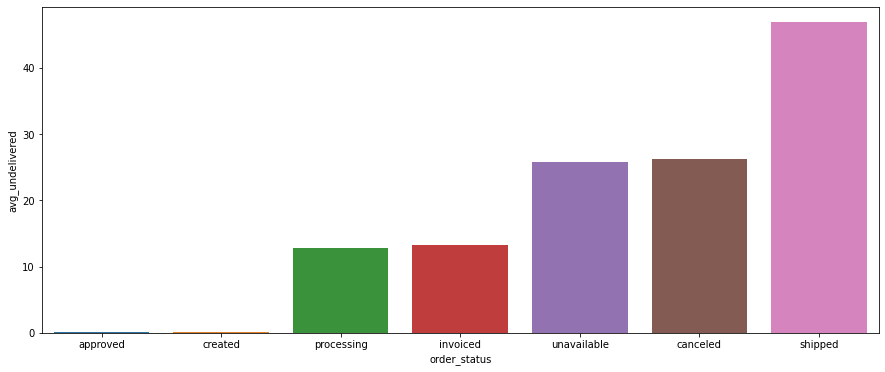

In [31]:
plt.figure(figsize=(15, 6))
sns.barplot(x=df_status_undelivered.order_status, y = df_status_undelivered.avg_undelivered);

 Видим, что большего всего в месяц в среднем не доставляется заказов со статусом shipped

# 3. По каждому товару определить, в какой день недели товар чаще всего покупается. (5 баллов)

Объединим необходимые датафреймы

In [32]:
orderes_merged = order_items.merge(orders[['order_id','order_purchase_timestamp','order_approved_at']],
                                   how='left',
                                   on='order_id')

Добавим колонку weekday - день недели. Будем смотреть по колонке order_approved_at, т.к покупкой считаем оплаченный заказ.

In [33]:
orderes_merged = orderes_merged.query('order_approved_at==order_approved_at')

In [34]:
orderes_merged['weekday'] = orderes_merged.order_approved_at.dt.day_name()

In [35]:
# orderes_merged.loc[orderes_merged.product_id == '3fbc0ef745950c7932d5f2a446189725']['weekday'].value_counts()

In [36]:
orderes_merged.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,order_purchase_timestamp,order_approved_at,weekday
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,2017-09-13 08:59:02,2017-09-13 09:45:35,Wednesday
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,2017-04-26 10:53:06,2017-04-26 11:05:13,Wednesday
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,2018-01-14 14:33:31,2018-01-14 14:48:30,Sunday
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,2018-08-08 10:00:35,2018-08-08 10:10:18,Wednesday
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,2017-02-04 13:57:51,2017-02-04 14:10:13,Saturday


Сгруппируем данные по айди продукта и дню недели, посчитаем количество покупок в каждый день недели, отсортируем в порядке убывания и возьмем первый сверху день. Получим день недели, в который товар чаще всего покупается.

In [37]:
most_frequent_sales_day = orderes_merged \
    .groupby(['product_id','weekday'],as_index=False) \
    .agg({'seller_id':'count'}) \
    .rename(columns={'seller_id':'quantity'}) \
    .sort_values('quantity',ascending=False) \
    .groupby(['product_id'],as_index=False).head(1) \

In [38]:
most_frequent_sales_day.head(10)

,product_id,weekday,quantity
41082,aca2eb7d00ea1a7b8ebd4e68314663af,Tuesday,119
20152,53b36df67ebb7c41585e8d54d6772e08,Tuesday,105
15933,422879e10f46682990de24d770e7f83d,Tuesday,89
36574,99a4788cb24856965c36a24e339b6058,Tuesday,82
13060,368c6c730842d78016ad823897a372db,Thursday,80
13581,389d119b48cf3043d311335e499d9c6b,Tuesday,75
20102,53759a2ecddad2bb87a079a1f1519f73,Tuesday,73
50184,d1c427060a0f73f6b889a5c7c61f2ac4,Tuesday,63
14873,3dd2a17168ec895c781a9191c1e95ad7,Wednesday,58
5165,154e7e31ebfa092203795c972e5804a6,Tuesday,56


# 4. Сколько у каждого из пользователей в среднем покупок в неделю (по месяцам)? Не стоит забывать, что внутри месяца может быть не целое количество недель. Например, в ноябре 2021 года 4,28 недели. И внутри метрики это нужно учесть. (8 баллов) 

Объединил нужные датафреймы

In [39]:
merged = customers[['customer_id','customer_unique_id']].merge(orders[['customer_id','order_id','order_status','order_purchase_timestamp']].query('order_status == "delivered"'),
               how='inner',
               on='customer_id')

Добавил дополнительную колонку год-месяц для последующей группировки

In [40]:
merged['pay_month'] = merged['order_purchase_timestamp'].dt.strftime('%Y-%m')

In [41]:
merged

,customer_id,customer_unique_id,order_id,order_status,order_purchase_timestamp,pay_month
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07
...,...,...,...,...,...,...
96459,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,2018-04
96460,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:22,2018-04
96461,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:50,2018-04
96462,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:33,2017-11


In [42]:
# возвращает номер текущей недели из даты
# merged['test'] = merged['order_purchase_timestamp'].apply(lambda d: (d.day-1) // 7 + 1)

Группирую по айди кастомера и дате год-месяц для подсчета числа покупок в месяц

In [43]:
res = merged \
    .groupby(['customer_unique_id','pay_month'],as_index=False) \
    .order_id.nunique() \
    .rename(columns={'order_id':'num_of_purchases_per_month'})
res

,customer_unique_id,pay_month,num_of_purchases_per_month
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05,1
2,0000f46a3911fa3c0805444483337064,2017-03,1
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10,1
4,0004aac84e0df4da2b147fca70cf8255,2017-11,1
...,...,...,...
95175,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06,1
95176,fffea47cd6d3cc0a88bd621562a9d061,2017-12,1
95177,ffff371b4d645b6ecea244b27531430a,2017-02,1
95178,ffff5962728ec6157033ef9805bacc48,2018-05,1


Всего около 1% пользователей покупают в среднем больше одного раза в месяц

In [44]:
res.query('num_of_purchases_per_month != 1')['customer_unique_id'].nunique() / res['customer_unique_id'].nunique()

0.01300551716749692

Добавляю колонку со средним числом покупок в неделю по месяцам. 

Получаю количество дней в месяце и делю это число на 7, чтобы получить количество недель в месяце с дробной частью, как и требует условие задачи. 
```
res['pay_month'].apply(lambda t: pd.Period(t, freq='S').days_in_month) / 7
```
Делю число покупок в месяц на количество недель в месяце.

In [45]:
res['avg_num_of_purchases_per_week_by_month'] = res.num_of_purchases_per_month / (res['pay_month'].apply(lambda t: pd.Period(t, freq='S').days_in_month) / 7)

In [46]:
res.head()

,customer_unique_id,pay_month,num_of_purchases_per_month,avg_num_of_purchases_per_week_by_month
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05,1,0.225806
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05,1,0.225806
2,0000f46a3911fa3c0805444483337064,2017-03,1,0.225806
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10,1,0.225806
4,0004aac84e0df4da2b147fca70cf8255,2017-11,1,0.233333


# 5. Используя pandas, проведи когортный анализ пользователей. В период с января по декабрь выяви когорту с самым высоким retention на 3й месяц. Описание подхода можно найти тут. 

In [47]:
cohort = pd.merge(orders, customers, on='customer_id').\
    query('order_approved_at==order_approved_at')[['customer_unique_id', 'order_id', 'order_approved_at']]

In [48]:
# создадим колонку с датой покупки
cohort['purchase_date']= cohort['order_approved_at'].dt.to_period('M')

In [49]:
cohort.head()

,customer_unique_id,order_id,order_approved_at,purchase_date
0,7c396fd4830fd04220f754e42b4e5bff,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 11:07:15,2017-10
1,af07308b275d755c9edb36a90c618231,53cdb2fc8bc7dce0b6741e2150273451,2018-07-26 03:24:27,2018-07
2,3a653a41f6f9fc3d2a113cf8398680e8,47770eb9100c2d0c44946d9cf07ec65d,2018-08-08 08:55:23,2018-08
3,7c142cf63193a1473d2e66489a9ae977,949d5b44dbf5de918fe9c16f97b45f8a,2017-11-18 19:45:59,2017-11
4,72632f0f9dd73dfee390c9b22eb56dd6,ad21c59c0840e6cb83a9ceb5573f8159,2018-02-13 22:20:29,2018-02


In [50]:
#создадим колонку с датой первой покупки (когорта)
cohort.set_index('customer_unique_id', inplace=True)

cohort['first_purchase'] = cohort \
                .groupby(level=0)['order_approved_at'] \
                .min().apply(lambda x: x.to_period('M'))

cohort.reset_index(inplace=True)

In [51]:
cohort.head()

,customer_unique_id,order_id,order_approved_at,purchase_date,first_purchase
0,7c396fd4830fd04220f754e42b4e5bff,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 11:07:15,2017-10,2017-09
1,af07308b275d755c9edb36a90c618231,53cdb2fc8bc7dce0b6741e2150273451,2018-07-26 03:24:27,2018-07,2018-07
2,3a653a41f6f9fc3d2a113cf8398680e8,47770eb9100c2d0c44946d9cf07ec65d,2018-08-08 08:55:23,2018-08,2018-08
3,7c142cf63193a1473d2e66489a9ae977,949d5b44dbf5de918fe9c16f97b45f8a,2017-11-18 19:45:59,2017-11,2017-11
4,72632f0f9dd73dfee390c9b22eb56dd6,ad21c59c0840e6cb83a9ceb5573f8159,2018-02-13 22:20:29,2018-02,2018-02


In [52]:
# определим количество человек в каждой когорте
cohort = cohort.groupby(['first_purchase', 'purchase_date'])\
                     .agg(n_customers=('customer_unique_id', 'nunique'))\
#                      .reset_index(drop=False)
cohort.head()

n_customers
first_purchase purchase_date             
2016-09        2016-09                  1
2016-10        2016-10                317
               2017-04                  1
               2017-07                  1
               2017-09                  1

In [53]:
def cohort_period(df):
    df['cohort_period'] = np.arange(len(df)) + 1 
    return df

In [54]:
cohort = cohort.groupby(level=0).apply(cohort_period)
cohort.reset_index(inplace=True)

In [55]:
cohort.head(20)

,first_purchase,purchase_date,n_customers,cohort_period
0,2016-09,2016-09,1,1
1,2016-10,2016-10,317,1
2,2016-10,2017-04,1,2
3,2016-10,2017-07,1,3
4,2016-10,2017-09,1,4
5,2016-10,2017-11,1,5
6,2016-10,2018-01,1,6
7,2016-10,2018-03,1,7
8,2016-10,2018-05,2,8
9,2016-10,2018-06,2,9


In [56]:
cohort = cohort.query('first_purchase >= "2017-01"')
cohort.head()

,first_purchase,purchase_date,n_customers,cohort_period
12,2017-01,2017-01,726,1
13,2017-01,2017-02,4,2
14,2017-01,2017-03,2,3
15,2017-01,2017-04,1,4
16,2017-01,2017-05,3,5


In [57]:
cohort_pivot = cohort.pivot_table(index   ='first_purchase',
                                  columns ='cohort_period',
                                  values  ='n_customers')
cohort_pivot

cohort_period,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
first_purchase,,,,,,,,,,,,,,,,,,
2017-01,726.0,4.0,2.0,1.0,3.0,1.0,4.0,1.0,1.0,2.0,2.0,6.0,3.0,1.0,1.0,2.0,3.0,1.0
2017-02,1736.0,4.0,4.0,3.0,7.0,2.0,4.0,3.0,2.0,4.0,2.0,5.0,3.0,3.0,2.0,1.0,1.0,4.0
2017-03,2643.0,13.0,9.0,9.0,9.0,4.0,4.0,8.0,8.0,3.0,10.0,4.0,6.0,3.0,4.0,6.0,2.0,4.0
2017-04,2323.0,14.0,5.0,4.0,7.0,6.0,8.0,6.0,8.0,4.0,5.0,2.0,2.0,1.0,2.0,2.0,5.0,NaN
2017-05,3592.0,19.0,18.0,14.0,11.0,12.0,15.0,6.0,9.0,11.0,10.0,12.0,7.0,2.0,7.0,9.0,NaN,NaN
2017-06,3148.0,15.0,11.0,13.0,8.0,11.0,12.0,7.0,4.0,7.0,10.0,12.0,5.0,4.0,6.0,NaN,NaN,NaN
2017-07,3843.0,20.0,13.0,8.0,13.0,7.0,12.0,4.0,7.0,9.0,9.0,12.0,5.0,10.0,NaN,NaN,NaN,NaN
2017-08,4204.0,28.0,15.0,11.0,16.0,22.0,11.0,11.0,5.0,7.0,10.0,7.0,5.0,NaN,NaN,NaN,NaN,NaN
2017-09,4148.0,27.0,20.0,14.0,18.0,11.0,9.0,9.0,13.0,7.0,11.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN


In [58]:
cohort_size = cohort_pivot.iloc[:, 0]
retention_matrix = cohort_pivot.divide(cohort_size, axis=0)
retention_matrix

cohort_period,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
first_purchase,,,,,,,,,,,,,,,,,,
2017-01,1.0,0.005510,0.002755,0.001377,0.004132,0.001377,0.005510,0.001377,0.001377,0.002755,0.002755,0.008264,0.004132,0.001377,0.001377,0.002755,0.004132,0.001377
2017-02,1.0,0.002304,0.002304,0.001728,0.004032,0.001152,0.002304,0.001728,0.001152,0.002304,0.001152,0.002880,0.001728,0.001728,0.001152,0.000576,0.000576,0.002304
2017-03,1.0,0.004919,0.003405,0.003405,0.003405,0.001513,0.001513,0.003027,0.003027,0.001135,0.003784,0.001513,0.002270,0.001135,0.001513,0.002270,0.000757,0.001513
2017-04,1.0,0.006027,0.002152,0.001722,0.003013,0.002583,0.003444,0.002583,0.003444,0.001722,0.002152,0.000861,0.000861,0.000430,0.000861,0.000861,0.002152,NaN
2017-05,1.0,0.005290,0.005011,0.003898,0.003062,0.003341,0.004176,0.001670,0.002506,0.003062,0.002784,0.003341,0.001949,0.000557,0.001949,0.002506,NaN,NaN
2017-06,1.0,0.004765,0.003494,0.004130,0.002541,0.003494,0.003812,0.002224,0.001271,0.002224,0.003177,0.003812,0.001588,0.001271,0.001906,NaN,NaN,NaN
2017-07,1.0,0.005204,0.003383,0.002082,0.003383,0.001821,0.003123,0.001041,0.001821,0.002342,0.002342,0.003123,0.001301,0.002602,NaN,NaN,NaN,NaN
2017-08,1.0,0.006660,0.003568,0.002617,0.003806,0.005233,0.002617,0.002617,0.001189,0.001665,0.002379,0.001665,0.001189,NaN,NaN,NaN,NaN,NaN
2017-09,1.0,0.006509,0.004822,0.003375,0.004339,0.002652,0.002170,0.002170,0.003134,0.001688,0.002652,0.000723,NaN,NaN,NaN,NaN,NaN,NaN


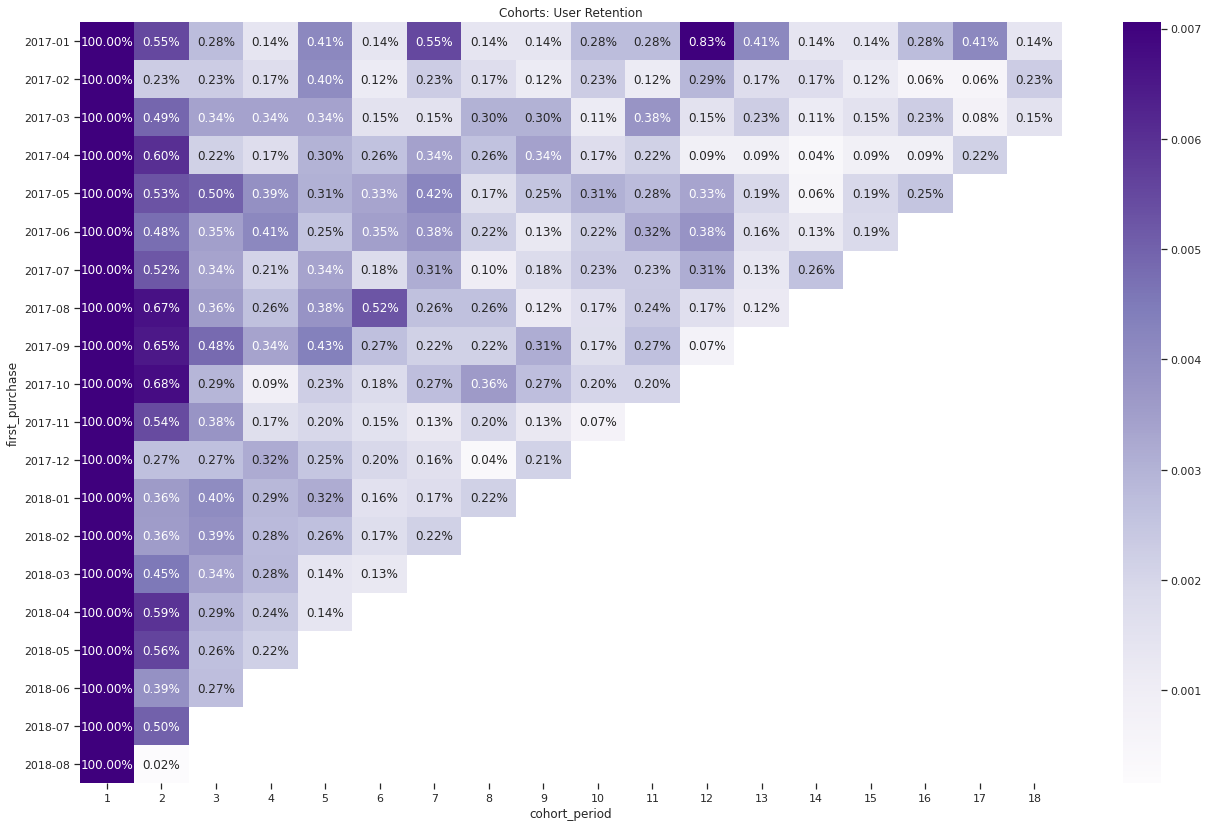

In [59]:
sns.set(style='ticks')
plt.figure(figsize=(22, 14))
plt.title('Cohorts: User Retention')
sns.heatmap(retention_matrix, mask=retention_matrix.isnull(), annot=True, fmt='.2%', vmax = 0.007057, cmap='Purples');

In [60]:
highest_retention = list(retention_matrix.loc[retention_matrix[4] == retention_matrix.iloc[:, 3].max()].index)

print(f'{highest_retention} - когорты с самым высоким retention на 3й месяц')

[Period('2017-06', 'M')] - когорты с самым высоким retention на 3й месяц


# 6. Часто для качественного анализа аудитории использую подходы, основанные на сегментации. Используя python, построй RFM-сегментацию пользователей, чтобы качественно оценить свою аудиторию. В кластеризации можешь выбрать следующие метрики: R - время от последней покупки пользователя до текущей даты, F - суммарное количество покупок у пользователя за всё время, M - сумма покупок за всё время. Подробно опиши, как ты создавал кластеры. Для каждого RFM-сегмента построй границы метрик recency, frequency и monetary для интерпретации этих кластеров. Пример такого описания: RFM-сегмент 132 (recency=1, frequency=3, monetary=2) имеет границы метрик recency от 130 до 500 дней, frequency от 2 до 5 заказов в неделю, monetary от 1780 до 3560 рублей в неделю.  (35 баллов)

In [61]:
df_rfm = customers.merge(orders.merge(order_items, on='order_id'), on='customer_id')\
                  .query('order_approved_at==order_approved_at')

In [62]:
df_rfm=df_rfm[['customer_unique_id', 'order_approved_at', 'price']]

In [63]:
df_rfm.head()

,customer_unique_id,order_approved_at,price
0,861eff4711a542e4b93843c6dd7febb0,2017-05-16 15:22:12,124.99
1,290c77bc529b7ac935b93aa66c333dc3,2018-01-12 20:58:32,289.00
2,060e732b5b29e8181a18229c7b0b2b5e,2018-05-20 16:19:10,139.94
3,259dac757896d24d7702b9acbbff3f3c,2018-03-13 17:29:19,149.94
4,345ecd01c38d18a9036ed96c73b8d066,2018-07-29 10:10:09,230.00


In [64]:
now = df_rfm['order_approved_at'].max() + timedelta(days=1)
now

Timestamp('2018-09-04 17:40:06')

In [65]:
# считаем количество дней с момента последней покупки
df_rfm['DaysSinceOrder'] = df_rfm['order_approved_at'].apply(lambda x: (now - x).days)

Для создания RFM-сегментации мы сгруппируем наши записи по customer_unique_id и посчитаем нужные метрики : 

Recency - показывает количество дней с момента последнего заказа (давность покупки). 

Frequency - число заказов на одного пользователя. 

Monetary - общая сумма, потраченная пользователем.

In [66]:
df_rfm = df_rfm \
    .groupby('customer_unique_id') \
    .agg({
        'DaysSinceOrder': 'min',  # Recency
        'order_approved_at': 'count', # Frequency
        'price': 'sum', # Monetary
       }) \
    .reset_index() \
    .rename(columns={'DaysSinceOrder': 'recency', 'order_approved_at': 'frequency', 'price': 'monetary'})

df_rfm.head()

,customer_unique_id,recency,frequency,monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,117,1,129.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,119,1,18.90
2,0000f46a3911fa3c0805444483337064,542,1,69.00
3,0000f6ccb0745a6a4b88665a16c9f078,326,1,25.99
4,0004aac84e0df4da2b147fca70cf8255,293,1,180.00


/opt/tljh/user/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


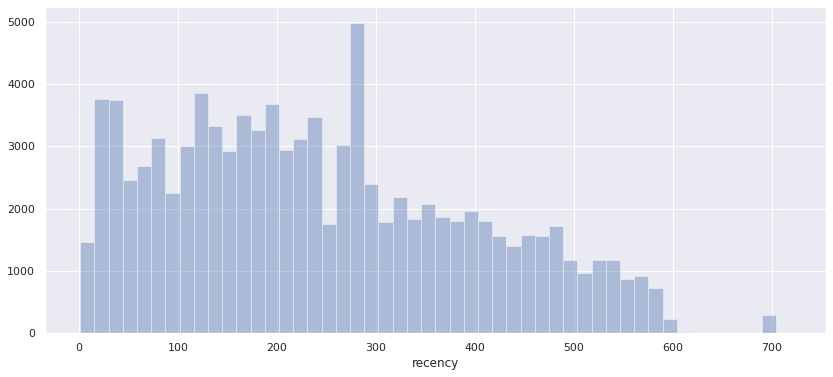

In [67]:
sns.set(rc={'figure.figsize':(14, 6)})
sns.distplot(df_rfm.recency, kde=False);

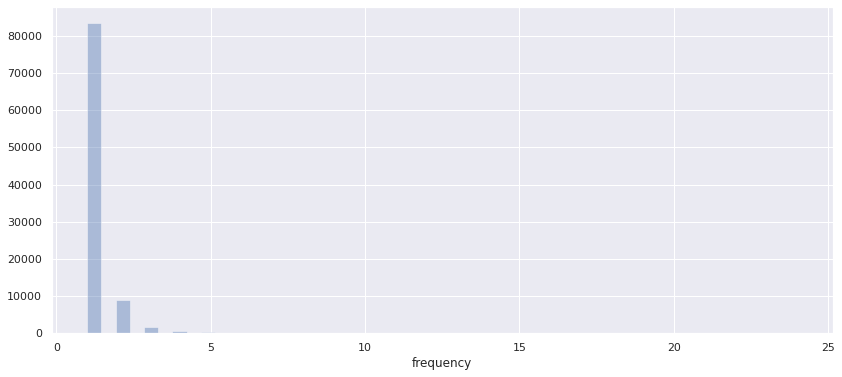

In [68]:
sns.set(rc={'figure.figsize':(14, 6)})
sns.distplot(df_rfm.frequency, kde=False);

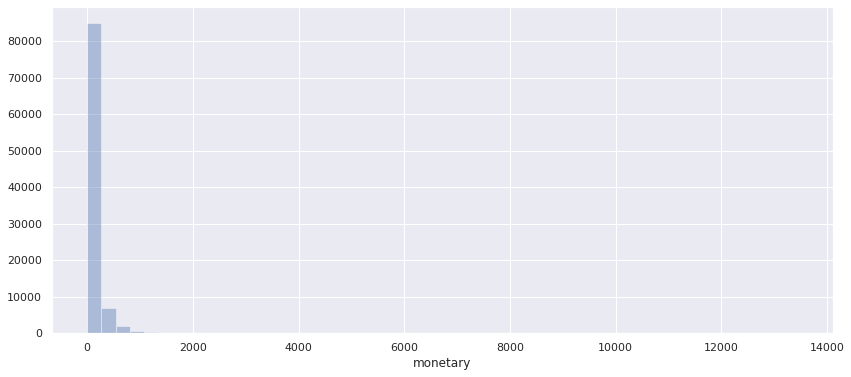

In [69]:
sns.set(rc={'figure.figsize':(14, 6)})
sns.distplot(df_rfm.monetary, kde=False);

Посчитаем R, F, M значения для каждого пользователя.

Каждый клиент получит оценку от 1 до 5 по значению каждой метрики. Устанавливать диапазоны будем с помощью квантилей, потому что этот подход является гибким, диапазоны будут адаптироваться к данным и корректно отражать изменения в поведении пользователей.

In [70]:
quantiles = df_rfm.quantile(q=[0.20,0.40,0.60,0.80])
quantiles

,recency,frequency,monetary
0.2,98.0,1.0,39.9
0.4,182.0,1.0,69.9
0.6,273.0,1.0,109.9
0.8,389.0,1.0,179.9


In [71]:
quantiles = df_rfm.quantile(q=[0.20, 0.40, 0.60, 0.80])
quantiles = quantiles.to_dict()
segmented_rfm = df_rfm

def RScore(x,p,d):
     if x <= d[p][0.20]:
         return 1
     elif x <= d[p][0.40]:
         return 2
     elif x <= d[p][0.60]: 
         return 3
     elif x<=d[p][0.80]:
         return 4
     else:
         return 5

segmented_rfm['R'] = segmented_rfm['recency'].apply(RScore, args=('recency',quantiles))
segmented_rfm['F'] = segmented_rfm['frequency'].apply(RScore, args=('frequency',quantiles))
segmented_rfm['M'] = segmented_rfm['monetary'].apply(RScore, args=('monetary',quantiles))
segmented_rfm['RFMScore'] = segmented_rfm.R.map(str) + segmented_rfm.F.map(str) + segmented_rfm.M.map(str)
segmented_rfm.head()

,customer_unique_id,recency,frequency,monetary,R,F,M,RFMScore
0,0000366f3b9a7992bf8c76cfdf3221e2,117,1,129.90,2,1,4,214
1,0000b849f77a49e4a4ce2b2a4ca5be3f,119,1,18.90,2,1,1,211
2,0000f46a3911fa3c0805444483337064,542,1,69.00,5,1,2,512
3,0000f6ccb0745a6a4b88665a16c9f078,326,1,25.99,4,1,1,411
4,0004aac84e0df4da2b147fca70cf8255,293,1,180.00,4,1,5,415


In [72]:
segmented_rfm.R.value_counts()

1    19188
3    19171
4    19069
2    19006
5    18973
Name: R, dtype: int64

In [73]:
segmented_rfm.F.value_counts()

1    83540
5    11867
Name: F, dtype: int64

In [74]:
segmented_rfm.M.value_counts()

2    19811
1    19727
4    19050
5    19031
3    17788
Name: M, dtype: int64

In [75]:
segmented_rfm

,customer_unique_id,recency,frequency,monetary,R,F,M,RFMScore
0,0000366f3b9a7992bf8c76cfdf3221e2,117,1,129.90,2,1,4,214
1,0000b849f77a49e4a4ce2b2a4ca5be3f,119,1,18.90,2,1,1,211
2,0000f46a3911fa3c0805444483337064,542,1,69.00,5,1,2,512
3,0000f6ccb0745a6a4b88665a16c9f078,326,1,25.99,4,1,1,411
4,0004aac84e0df4da2b147fca70cf8255,293,1,180.00,4,1,5,415
...,...,...,...,...,...,...,...,...
95402,fffcf5a5ff07b0908bd4e2dbc735a684,452,2,1570.00,5,5,5,555
95403,fffea47cd6d3cc0a88bd621562a9d061,267,1,64.89,3,1,2,312
95404,ffff371b4d645b6ecea244b27531430a,574,1,89.90,5,1,3,513
95405,ffff5962728ec6157033ef9805bacc48,125,1,115.00,2,1,4,214


Границы метрик

In [76]:
for score in range(1,6):
    print(f'R={score} is between {segmented_rfm.loc[segmented_rfm.R == score].recency.min()} and {segmented_rfm.loc[segmented_rfm.R == score].recency.max()}')
    print(f'F={score} is between {segmented_rfm.loc[segmented_rfm.F == score].frequency.min()} and {segmented_rfm.loc[segmented_rfm.F == score].frequency.max()}')
    print(f'M={score} is between {segmented_rfm.loc[segmented_rfm.M == score].monetary.min()} and {segmented_rfm.loc[segmented_rfm.M == score].monetary.max()}')
    print()

R=1 is between 1 and 98
F=1 is between 1 and 1
M=1 is between 0.85 and 39.9

R=2 is between 99 and 182
F=2 is between nan and nan
M=2 is between 39.900000000000006 and 69.9

R=3 is between 183 and 273
F=3 is between nan and nan
M=3 is between 69.94 and 109.9

R=4 is between 274 and 389
F=4 is between nan and nan
M=4 is between 109.94999999999999 and 179.9

R=5 is between 390 and 719
F=5 is between 2 and 24
M=5 is between 179.91 and 13440.0



Среднее значение recency по всем RMFScore

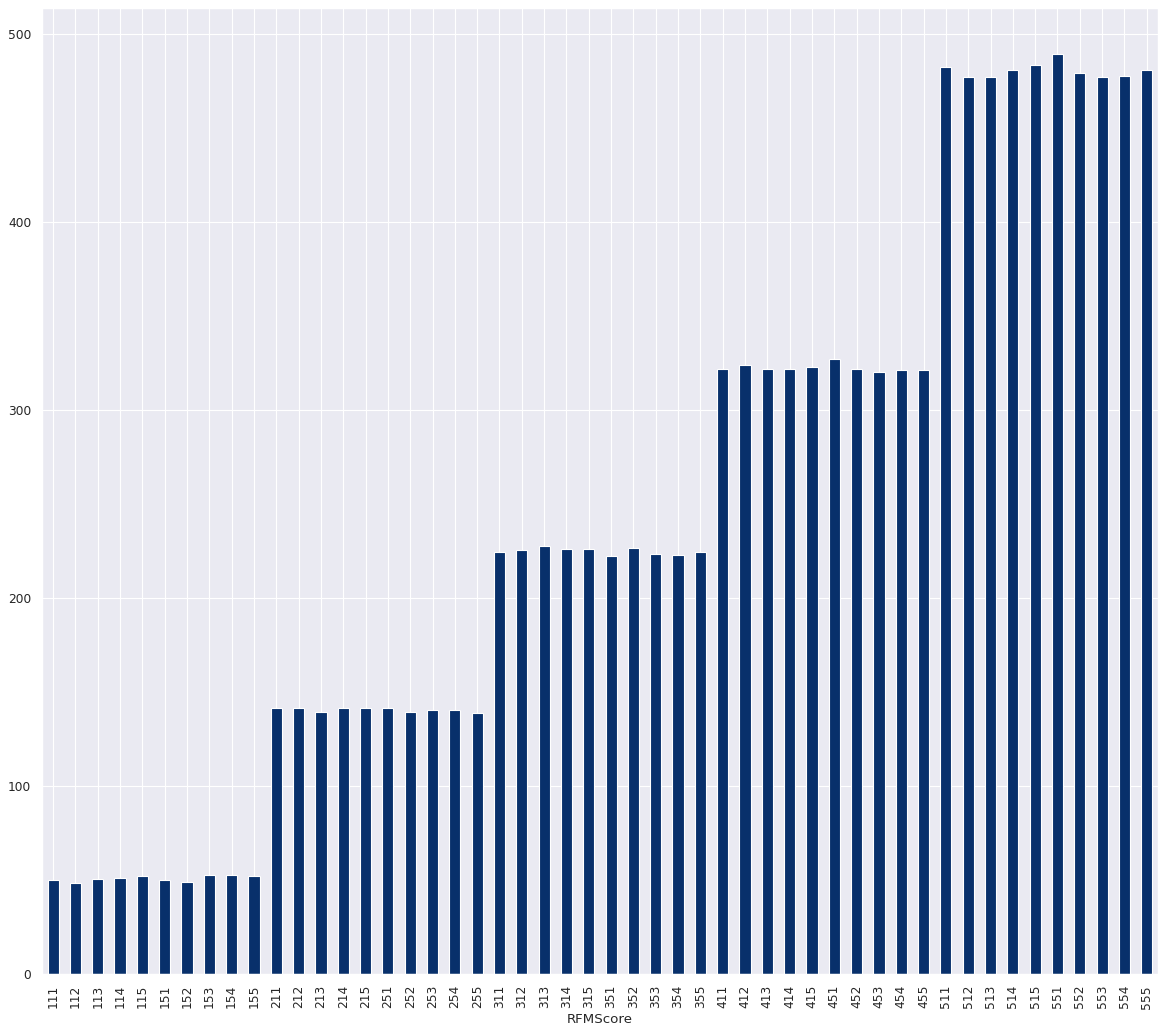

In [77]:
fig=plt.figure(figsize=(18, 16), dpi= 80, facecolor='w', edgecolor='k')
segmented_rfm.groupby('RFMScore').agg('recency').mean().plot(kind='bar', colormap='Blues_r')
plt.show()